In [1]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ticker = 'bbl'.upper()
sns.set_style('whitegrid')
stock_data = pd.read_csv(f'../dqn_allin/data/{ticker}.csv')

In [3]:
stock_data

,Date,stock_price,portfolio_value,current_val,stock_owned,cash_in_hand,stock_value,sell_buy,marker_buy,marker_sell,bechmark,benchmark
0,2018-01-02,41.660000,1000.000000,0.0,0.0,1000.000000,0.0,hold,NaN,NaN,2695.810059,2695.810059
1,2018-01-03,42.000000,1000.000000,0.0,0.0,1000.000000,0.0,hold,NaN,NaN,2713.060059,2713.060059
2,2018-01-04,42.150002,1000.000000,0.0,0.0,1000.000000,0.0,hold,NaN,NaN,2723.989990,2723.989990
3,2018-01-05,42.480000,1000.000000,0.0,0.0,1000.000000,0.0,hold,NaN,NaN,2743.149902,2743.149902
4,2018-01-08,43.180000,1000.000000,0.0,0.0,1000.000000,0.0,hold,NaN,NaN,2747.709961,2747.709961
...,...,...,...,...,...,...,...,...,...,...,...,...
751,2020-12-24,52.779999,998.357519,0.0,0.0,998.357519,0.0,hold,NaN,NaN,3703.060059,3703.060059
752,2020-12-28,53.009998,998.357519,0.0,0.0,998.357519,0.0,hold,NaN,NaN,3735.360107,3735.360107
753,2020-12-29,53.419998,998.357519,0.0,0.0,998.357519,0.0,hold,NaN,NaN,3727.040039,3727.040039
754,2020-12-30,53.439999,998.357519,0.0,0.0,998.357519,0.0,hold,NaN,NaN,3732.040039,3732.040039


<AxesSubplot:>

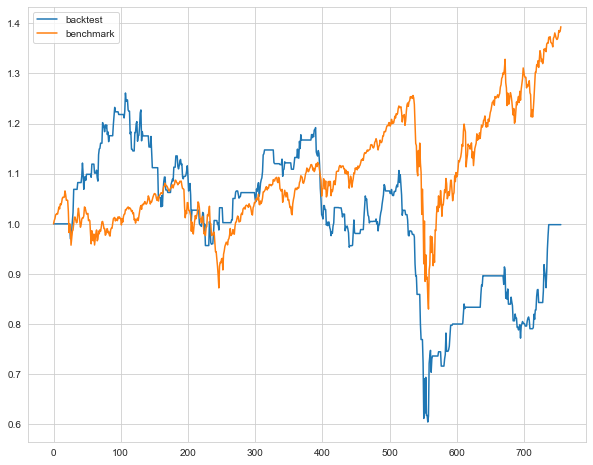

In [4]:
df = pd.DataFrame()
df['backtest'] = stock_data['portfolio_value'] / stock_data['portfolio_value'].iloc[0]
df['benchmark'] = stock_data['benchmark'] / stock_data['benchmark'].iloc[0]
df[['backtest', 'benchmark']].plot(figsize=(10,8))

<AxesSubplot:xlabel='backtest daily return', ylabel='benchmark daily return'>

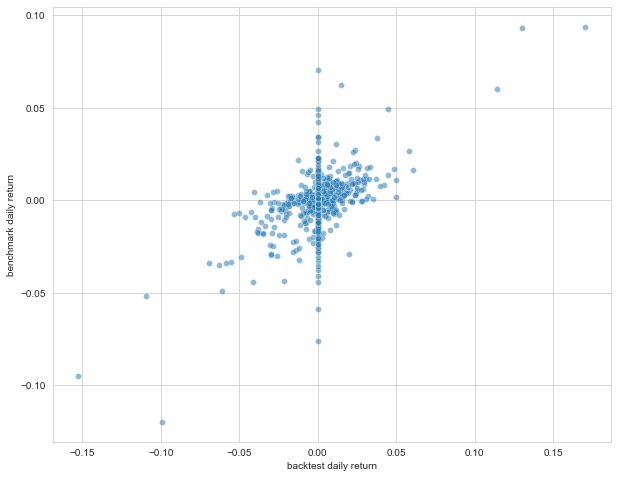

In [5]:
df['backtest daily return'] = stock_data['portfolio_value'].pct_change(1)
df['benchmark daily return'] = stock_data['benchmark'].pct_change(1)
plt.figure(figsize=(10,8))
sns.scatterplot(x='backtest daily return', y='benchmark daily return', data=df, alpha=0.5)

In [6]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [7]:
beta,alpha,r_value,p_value,std_err = stats.linregress(df['backtest daily return'].iloc[1:],df['benchmark daily return'].iloc[1:])
print(f'Stock name: {ticker}')
print(f'Beta: {beta:.4f}')
print(f'Alpha: {alpha:.4f}')
print(f'Correlation coefficient: {r_value:.4f}')

Stock name: BBL
Beta: 0.4942
Alpha: 0.0005
Correlation coefficient: 0.6102
